<a href="https://colab.research.google.com/github/SudharsonAK/Retailsales/blob/main/Retailsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Imports necessary Python libraries.
- Reads the retail sales dataset (`retail_sales_dataset.csv`).

In [35]:
# --- 1. Load Dataset ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [22]:
file_path = "retail_sales_dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)


- Converts the `Date` column to datetime format.
- Removes duplicate records.
- Drops any missing values.


In [23]:
# --- 2. Data Cleaning ---
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])



In [24]:
# Remove duplicates (if any)
df = df.drop_duplicates()

# Check for missing values
df = df.dropna()


- Extracts the `Month` from the `Date` column for time-series analysis.
- Aggregates total sales (`Total Amount`) per month.
- Converts the monthly index to a timestamp format for proper plotting and modeling.
- Uses the Augmented Dickey-Fuller test to check if the time series data is stationary.
- If p-value > 0.05, data is non-stationary, requiring differencing.

In [28]:
# --- 3. Data Preparation ---
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Total Amount"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales = monthly_sales.sort_index()

# Check stationarity using Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary, differencing needed")

- Plots the `Monthly Sales Trend` using Seaborn and Matplotlib.
- Helps identify trends, seasonality, and anomalies.

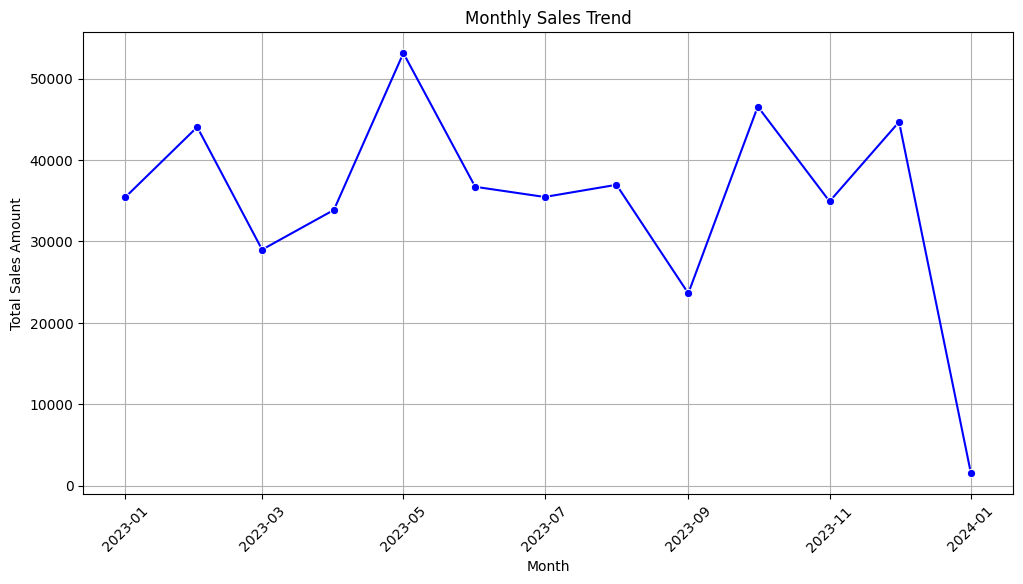

In [26]:
# --- 4. Visualization ---
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

- Uses **ARIMA (2,1,2)** model for time-series forecasting.
- Differencing is applied to make the data stationary.
- Forecasts **next month's sales** based on historical data.

In [30]:
# --- 5. Predictive Model ---
# Differencing to make data stationary
monthly_sales_diff = monthly_sales.diff().dropna()



In [31]:
# Build ARIMA Model
model = ARIMA(monthly_sales, order=(2,1,2))  # Adjust (p,d,q) as needed
model_fit = model.fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Sales for Next Month: ₹35,539.26


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-31-660b4a3bcb57>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Sales for Next Month: ₹{forecast[0]:,.2f}")


In [32]:
# Forecast Next Month's Sales
forecast_steps = 1  # Predict one month ahead
forecast = model_fit.forecast(steps=forecast_steps)
print(f"Predicted Sales for Next Month: ₹{forecast[0]:,.2f}")

Predicted Sales for Next Month: ₹35,539.26


<ipython-input-32-7b88920316c4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Sales for Next Month: ₹{forecast[0]:,.2f}")


- Saves the cleaned dataset (`cleaned_retail_sales.csv`) for further analysis in Power BI.
- Prints the file name for easy access.

In [33]:
# --- 6. Final Dataset for Power BI ---
df.to_csv("cleaned_retail_sales.csv", index=False)  # Save cleaned dataset for Power BI